# Titanic Survival Model demo

In this notebook we demonstrate the use of the titanic_survival_model package. Given a ML model, the package loads the Titanic dataset and allows us to:

- Make prediction with the model
- Visualize the model output (input may or may not contain ground truth)
- Measure the model performance (assuming input contains ground truth)
- Update the model, keeping track of all models
- Visualize history of models performance

## Imports

In [1]:
from titanic_survival_model.data import loader 
from titanic_survival_model.config import load_config
from titanic_survival_model.model import inference, training, registry
from titanic_survival_model.metrics import evaluation, monitoring, visualization

import pandas as pd
from  pprint import pprint
import random
from sklearn.linear_model import LogisticRegression

## Utilities

In [2]:
def generate_synthetic_titanic(batch_size: int, age_impact: float, survival_rate: float):
    """
    Generate a synthetic Titanic dataset as a pandas DataFrame.
    """

    assert batch_size > 0, "batch_size must be positive"
    assert 0 <= age_impact <= 1, "age_impact must be in [0, 1]"
    assert 0 <= survival_rate <= 1, "survival_rate must be in [0, 1]"

    age_low = 18
    age_high = 100 - age_impact * 70

    data = {
        "Pclass": [random.choice([1, 2, 3]) for _ in range(batch_size)],
        "Sex": [random.choice([0, 1]) for _ in range(batch_size)],
        "Age": [random.uniform(age_low, age_high) for _ in range(batch_size)],
        "Fare": [random.uniform(0, 500) for _ in range(batch_size)],
        "Survived": [1 if random.random() < survival_rate else 0 for _ in range(batch_size)]
    }

    return pd.DataFrame(data)

## Loading the data

In [3]:
X, y = loader.load_titanic()

## Training the model

In [4]:
model = LogisticRegression()

trained_model, _ = training.train(model, X, y)

## Making inference on new data and visualizing

In [11]:
new_data = generate_synthetic_titanic(100, 0, 0.5)

new_X = new_data.drop('Survived', axis=1)
new_y = new_data['Survived']

In [12]:
# Inference without ground truth

inference_without_truth = inference.predict(trained_model, new_X)

pprint(inference_without_truth)

Prediction(metrics=Metrics(input=InputMetrics(batch_size=100,
                                              positive_count=None,
                                              negative_count=None,
                                              positive_rate=None),
                           prediction=PredictionMetrics(positive_rate=0.24,
                                                        positive_count=24,
                                                        negative_count=76,
                                                        min_score=0.00551420612969775,
                                                        mean_score=0.29270910234584235,
                                                        max_score=0.939605543660379,
                                                        score_std=0.2598963077109022),
                           performance=PerformanceMetrics(confusion_matrix=None,
                                                          accuracy=None,
          

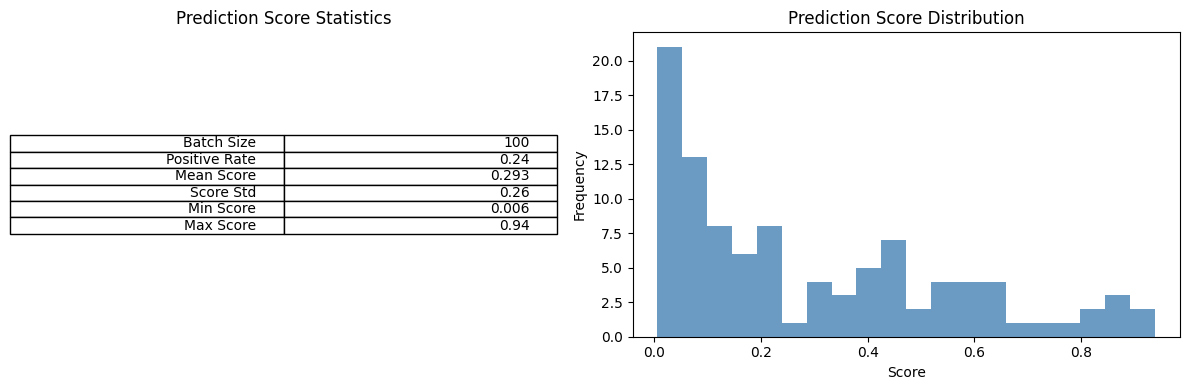

In [13]:
visualization.visualize_without_ground_truth(inference_without_truth)

In [14]:
# Inference with ground truth

inference_with_truth = inference.predict(trained_model, new_X, new_y)

pprint(inference_with_truth)

Prediction(metrics=Metrics(input=InputMetrics(batch_size=100,
                                              positive_count=38,
                                              negative_count=62,
                                              positive_rate=0.38),
                           prediction=PredictionMetrics(positive_rate=0.24,
                                                        positive_count=24,
                                                        negative_count=76,
                                                        min_score=0.00551420612969775,
                                                        mean_score=0.29270910234584235,
                                                        max_score=0.939605543660379,
                                                        score_std=0.2598963077109022),
                           performance=PerformanceMetrics(confusion_matrix=[[48,
                                                                             14],
     

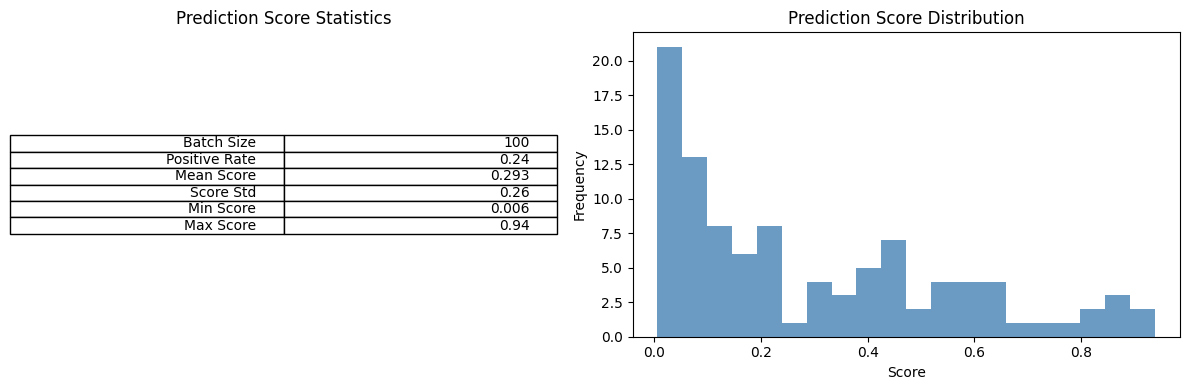

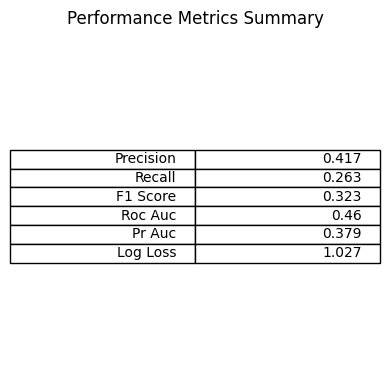

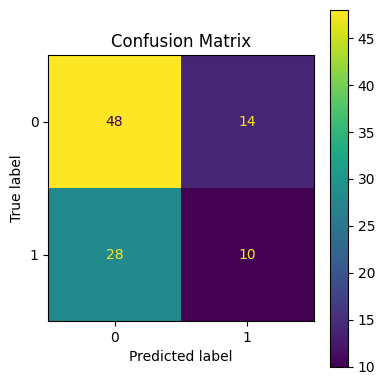

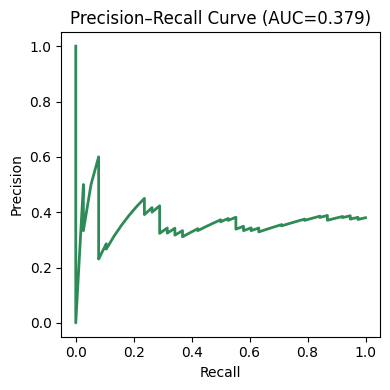

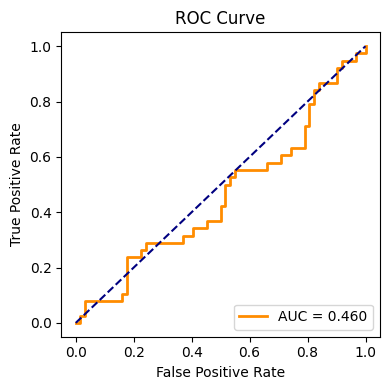

In [17]:
figs = visualization.visualize_with_ground_truth(inference_with_truth)

for fig in figs:
    display(fig)

## Track model training history

### Example: survival rate goes up and age becomes more and more determinant

In [5]:
for i in range(100):

    evolving_data = generate_synthetic_titanic(
        1000,
        i/100,
        0.5 + i/200
    )

    evolving_X = evolving_data.drop('Survived', axis=1)
    evolving_y = evolving_data['Survived']

    training.train(model, evolving_X, evolving_y)

In [6]:
history = monitoring.collect_performance_history()

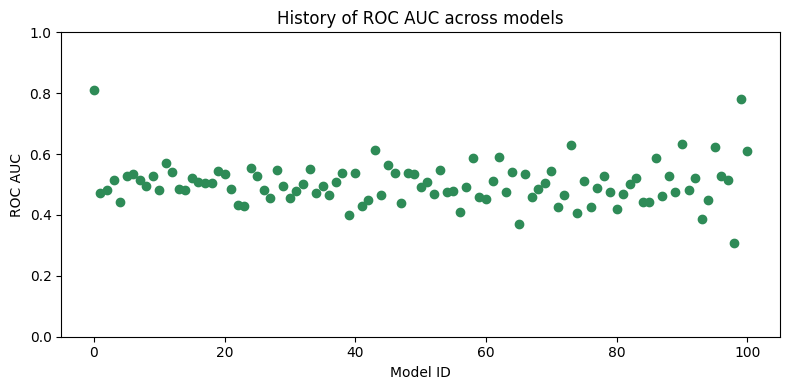

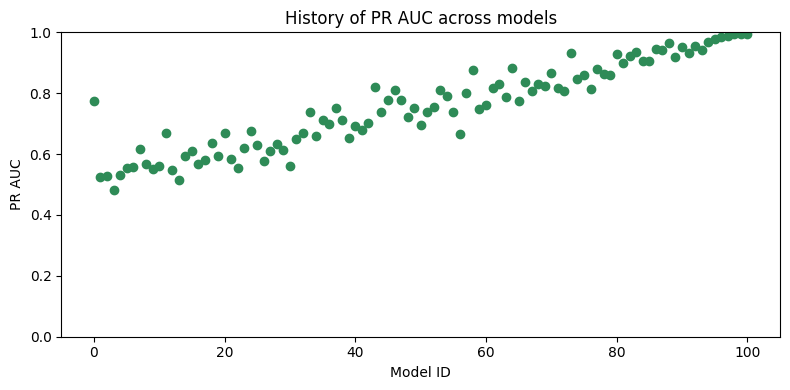

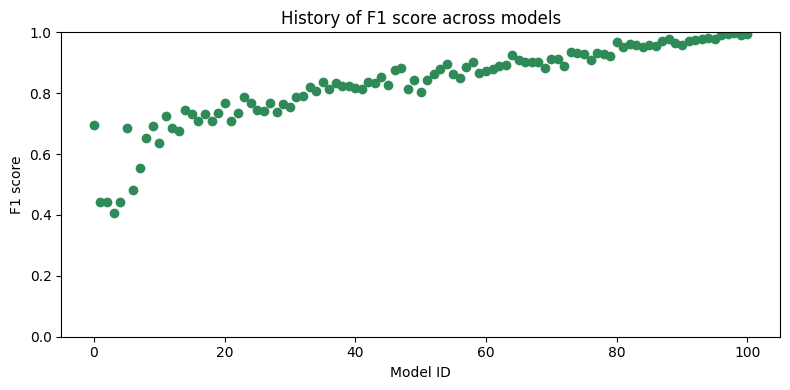

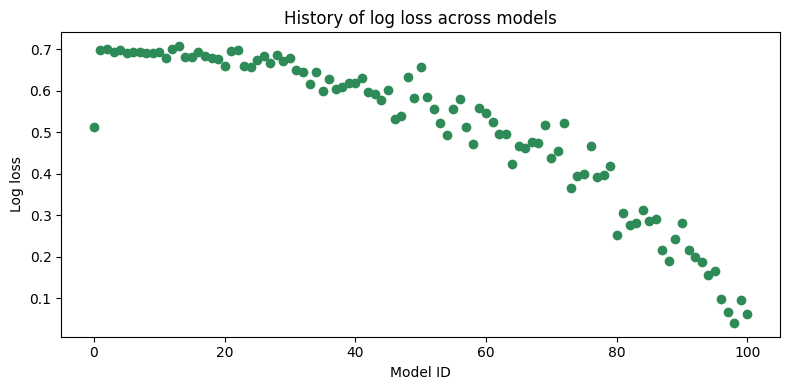

In [7]:
figs = visualization.visualize_performance_history(history)

for fig in figs:
    display(fig)